#### Step 1. Add dependencies

In [1]:
from typing import TypedDict, Dict, List
from langgraph.graph import StateGraph, START, END

#### Step 2. Define the structure of a state in the graph

In [2]:
class State(TypedDict):
    values: List[int]
    name: str
    result: str

#### Step 3. Add Node

In [21]:
def process_values(state: State)-> State:
    """Node that processes the values and updates the state."""
    new_state = State(
        values=[v * 2 for v in state['values']],
        name=state['name'],
        result=state['result']+"Values processed."
    )
    return new_state

#### Step 4. Init and fill Graph Builder

In [17]:
graph_builder = StateGraph(State)
graph_builder.add_node("process_values", process_values)
graph_builder.add_edge(START, "process_values")
graph_builder.add_edge("process_values", END)

#### Step 5. Compile Graph Builder

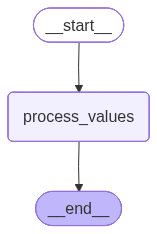

In [22]:
from IPython.display import Image, display
app = graph_builder.compile()
display(Image(app.get_graph().draw_mermaid_png()))

#### Step 6. Invoke Compiled Graph

In [23]:
result = app.invoke({"values": [1, 2, 3], "result": "Initial result: ", "name": "Test"})
print(result)
print(result['values'])  # Should show the processed values
print(result['result'])  # Should show the updated result string
print(result['name'])  # Should show the unchanged name

{'values': [2, 4, 6], 'name': 'Test', 'result': 'Initial result: Values processed.'}
[2, 4, 6]
Initial result: Values processed.
Test
